<a href="https://colab.research.google.com/github/ramirezramiro/linear-reg/blob/main/ch4_p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    y    x1    x2    x3    x4  x5   x6    x7    x8    x9
0  10  2113  1985  38.9  64.7   4  868  59.7  2205  1917
1  11  2003  2855  38.8  61.3   3  615  55.0  2096  1575
2  11  2957  1737  40.1  60.0  14  914  65.6  1847  2175
3  13  2285  2905  41.6  45.3  -4  957  61.4  1903  2476
4  10  2971  1666  39.2  53.8  15  836  66.1  1457  1886

n_samples:  28

n_features:  9

-----------
a. Construct a normal probability plot of the residuals. Does there seem to be any problem with the normality assumption?



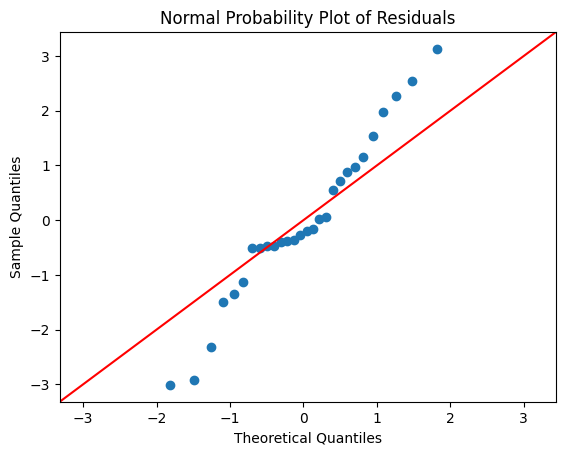


-----------

b. Construct and interpret a plot of the residuals versus the predicted response.



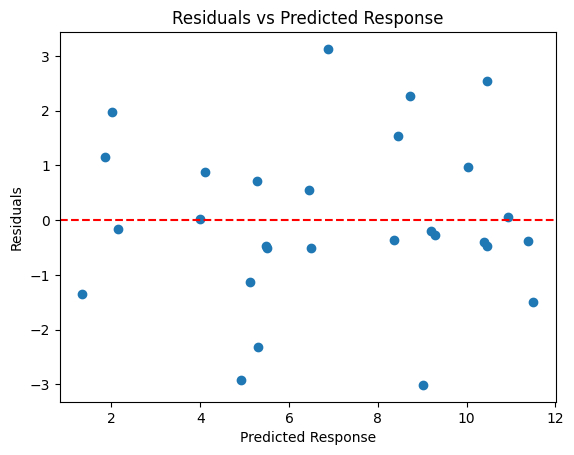


-----------

c. Construct plots of the residuals versus each of the regressor variables. Do these plots imply that the regressor is correctly specified?



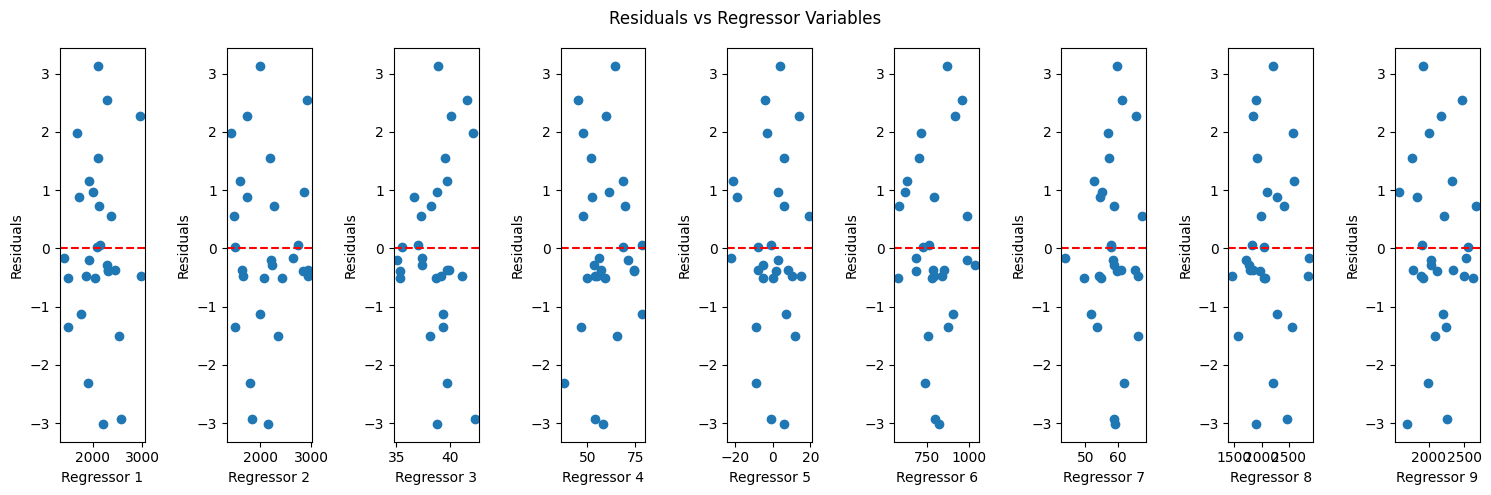


-----------

d. Construct the partial regression plots for this model. Compare the plots with the plots of residuals versus regressors from part c above. Discuss the type of information provided by these plots.

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


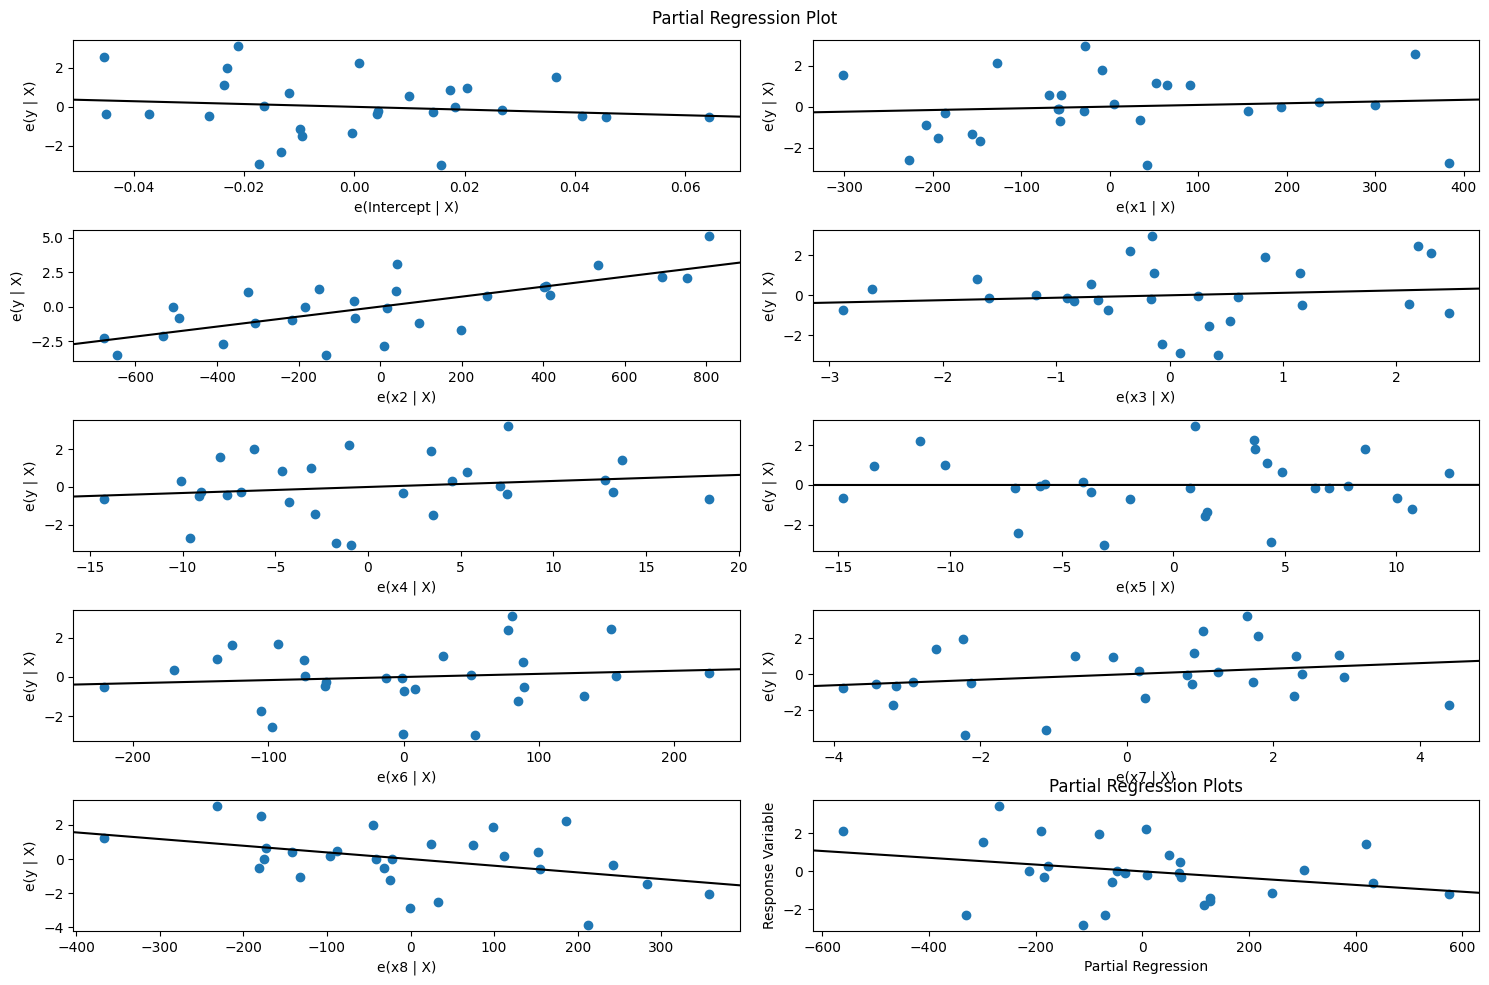


-----------

e. Compute the studentized residuals and the R - student residuals for this model. What information is conveyed by these scaled residuals?

Studentized Residuals:
[ 1.76570458  0.78286445  1.50504155  1.90202035 -0.11899481 -0.46284503
 -0.96434272 -0.03612135  1.26353674 -2.09486082  0.49747438  1.14242416
 -0.11728063 -0.11442948 -1.7065655   0.64751543 -0.03068876 -0.51717708
  0.43123892 -0.96130347 -1.64768315  0.69578629  0.10103733 -0.25005998
 -0.13450012 -0.41758336  0.02687625 -0.85331859]

R-Student Residuals:
[ 1.88715538  0.77410018  1.56437782  2.06787921 -0.11568768 -0.45250531
 -0.9623622  -0.03510491  1.28630633 -2.34113099  0.48681638  1.15281696
 -0.11401986 -0.11124594 -1.8114938   0.63673132 -0.0298249  -0.50638217
  0.42127072 -0.95916479 -1.73765457  0.6854635   0.0982185  -0.24343782
 -0.13077635 -0.40779817  0.02611954 -0.84657663]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.regressionplots import plot_partregress_grid

#dataset (df)
url='https://raw.githubusercontent.com/ramirezramiro/linear-reg/main/Model%20Adequacy%20Checking%20(ch.4)/data(ch.4)/table-b1.csv'
df=pd.read_csv(url)

specific_columns=df[["y","x1","x2","x3","x4","x5","x6","x7","x8","x9"]]
print(specific_columns.head())

# Extract the features (X) and target variable (y)
X = specific_columns[["x1","x2","x3","x4","x5","x6","x7","x8","x9"]].values
y = specific_columns["y"].values

n_samples = len(y)
print("\nn_samples: ", n_samples)

n_features=len(specific_columns.columns)-1
print("\nn_features: ", n_features)

model = sm.OLS(y, X)
results = model.fit()
residuals = results.resid
y_pred = results.predict(X)

print("\n-----------")
print("a. Construct a normal probability plot of the residuals. Does there seem to be any problem with the normality assumption?\n")
# Print the mathematical function of the model

sm.qqplot(residuals, line='45')

# Customize the plot
plt.title('Normal Probability Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
# Display the plot
plt.show()
print("\n-----------\n")

print("b. Construct and interpret a plot of the residuals versus the predicted response.\n")

# Plot the residuals versus the predicted response
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0

# Customize the plot
plt.title('Residuals vs Predicted Response')
plt.xlabel('Predicted Response')
plt.ylabel('Residuals')

# Display the plot
plt.show()
print("\n-----------\n")

print("c. Construct plots of the residuals versus each of the regressor variables. Do these plots imply that the regressor is correctly specified?\n")
# Plot residuals versus each regressor variable
fig, axs = plt.subplots(nrows=1, ncols=X.shape[1], figsize=(15, 5))
for i, regressor in enumerate(X.T):
    axs[i].scatter(regressor, residuals)
    axs[i].axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
    axs[i].set_xlabel(f'Regressor {i+1}')
    axs[i].set_ylabel('Residuals')

# Add a common title to the subplots
fig.suptitle('Residuals vs Regressor Variables')

# Adjust the spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

print("\n-----------\n")

print("d. Construct the partial regression plots for this model. Compare the plots with the plots of residuals versus regressors from part c above. Discuss the type of information provided by these plots.\n")

model_part_reg = ols("y ~ x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9", data=df).fit()
# Construct partial regression plots
fig = plt.figure(figsize=(15, 10))
plot_partregress_grid(model_part_reg, fig=fig)

# Customize the plot
plt.title('Partial Regression Plots')
plt.xlabel('Partial Regression')
plt.ylabel('Response Variable')

# Display the plot
plt.show()

print("\n-----------\n")

print("e. Compute the studentized residuals and the R - student residuals for this model. What information is conveyed by these scaled residuals?\n")

# Get the influence object
influence = model_part_reg.get_influence()

# Compute the studentized residuals
studentized_residuals = influence.resid_studentized_internal

# Compute the R-student residuals
r_student_residuals = influence.resid_studentized_external

# Print the computed residuals
print("Studentized Residuals:")
print(studentized_residuals)

print("\nR-Student Residuals:")
print(r_student_residuals)